# Phase competition from OSDAs

This notebook reproduces the phase competition plots from the paper, namely Figs. S7, S11, S15, and S21.

In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

df = pd.read_csv('../data/binding.csv', index_col=0)

## Useful functions

In [2]:
grid_kws = {"width_ratios": (.45, .45, .02), "hspace": .3}

def get_literature_markers(in_literature):
    if in_literature == 1.0:
        return '^'
    return 'o'

def mscatter(x, y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers

    ax = ax or plt.gca()
    sc = ax.scatter(x, y, **kw)

    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

scatter_kws = {
    'cmap': 'viridis_r',
    'linewidths': 0.7,
    'edgecolors': 'k',
    's': 60,
}

In [3]:
def plot_osda(OSDA, name):
    color_option = 'Templating'

    x = 'Binding (SiO2)'
    y = 'Binding (OSDA)'

    SIZE = 80
    LINEWIDTH = 0.7

    YLIM = [-250, 0]
    XLIM = [-19, 0]

    norm = mpl.colors.Normalize(vmin=15, vmax=25)
    cmap = 'inferno_r'

    fig, ax_fig = plt.subplots(1, 3, figsize=(8, 3.2), gridspec_kw=grid_kws)

    ax = ax_fig[0]

    d1 = df.loc[
        (df['SMILES'] == OSDA)
        & (df[y] > YLIM[0])
        & (df[y] < YLIM[1])
        & (df[x] > XLIM[0])
        & (df[x] < XLIM[1])
    ].sort_values('Templating', ascending=False)
    color_values = (d1[color_option]).values
    markers = d1['In literature?'].apply(get_literature_markers).values.tolist()

    scat1 = mscatter(
        d1[x],
        d1[y],
        ax=ax,
        c=color_values,
        m=markers,
        norm=norm,
        s=SIZE,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
    )

    ax.set_xlabel(x)
    ax.set_ylabel(y)

    ax.set_ylim(YLIM)
    ax.set_xlim(XLIM)

    ax = ax_fig[1]

    YLIM = [-250, -100]
    XLIM = [-19, -12]

    d = df.loc[
        (df['SMILES'] == OSDA)
        & (df[y] > YLIM[0])
        & (df[y] < YLIM[1])
        & (df[x] > XLIM[0])
        & (df[x] < XLIM[1])
    ].sort_values('Templating', ascending=False)
    color_values = (d[color_option]).values
    markers = d['In literature?'].apply(get_literature_markers).values.tolist()

    scat2 = mscatter(
        d[x],
        d[y],
        ax=ax,
        c=color_values,
        m=markers,
        norm=norm,
        s=SIZE,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
    )

    for _, row in d.iterrows():
        ax.annotate(
            row['Zeolite'],
            (row[x], row[y] - 5),
            zorder=3,
            ha='center',
            va='top',
            fontsize=12,
        )

    ax.set_xlabel(x)
    ax.set_ylim(YLIM)
    ax.set_xlim(XLIM)

    ax = ax_fig[2]
    cbar = fig.colorbar(scat1, cax=ax)
    cbar.set_label(color_option)
    cbar.set_ticks([15, 17, 19, 21, 23, 25])

    plt.show()
    
    return d1

In [4]:
osdas = {
    '1': 'CC[N+]1(C)C(C)(C)CCCC1(C)C',
    '2': 'CC[N+]1(CC)[C@H](C)CCC[C@H]1C',
    '3': 'CN(C)[P+](C)(N(C)C)N(C)C',
    '4': 'CC[P+](CC)(CC)CC',
    '5': 'C[N+](C)(C)C12CC3CC(CC(C3)C1)C2',
    '6': 'C[N+](C)(C)C1CCCCC1',  # trimethyl
    '7': 'CC[N+](C)(C)C1CCCCC1',  # methyldimethyl
    '8': 'CC[N+](C)(CC)C1CCCCC1',  # dimethylethyl
    '9': 'CC[N+](CC)(CC)CC',
    '10': 'C1CC[N+]2(C1)CCCC2',
    '11': 'C1CC[N+]2(CC1)CCCCC2',
    '12': 'C1CCC[N+]2(CC1)CCCCC2',
    '13': 'C1CCC[N+]2(CC1)CCCCCC2',
    '14': 'CC[N+](C)(C(C)C)C(C)C',
}

1


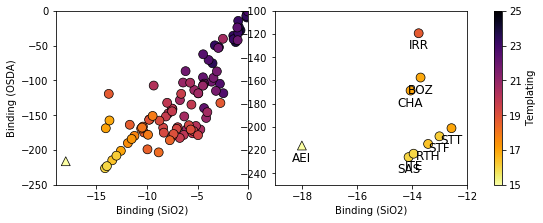

2


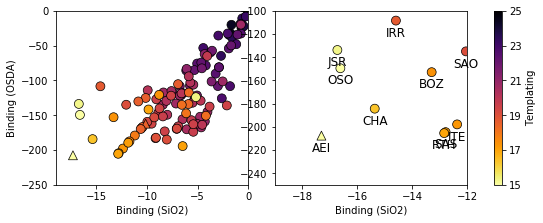

3


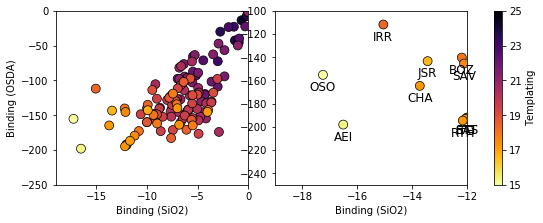

4


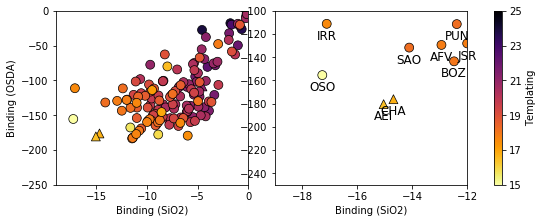

5


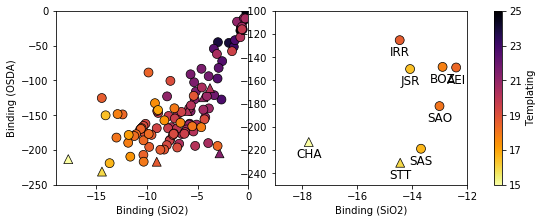

6


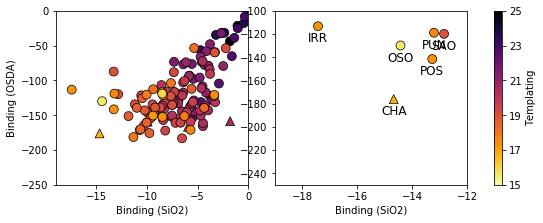

7


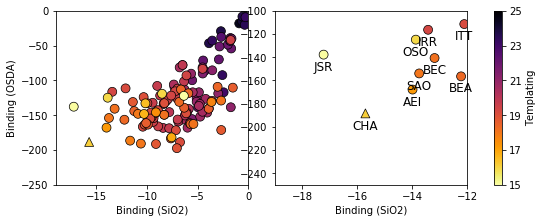

8


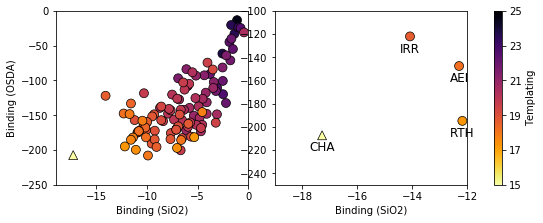

9


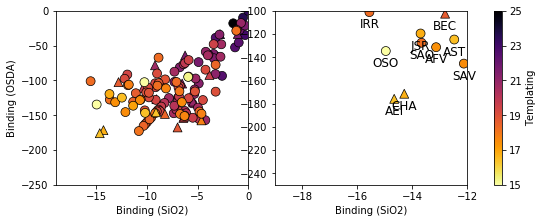

10


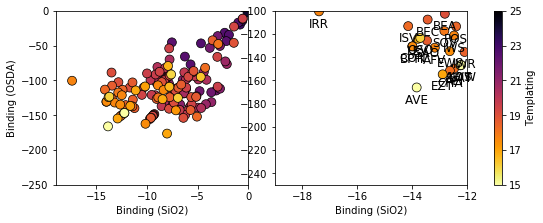

11


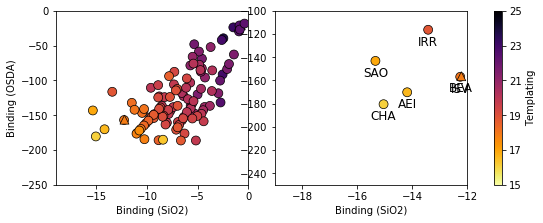

12


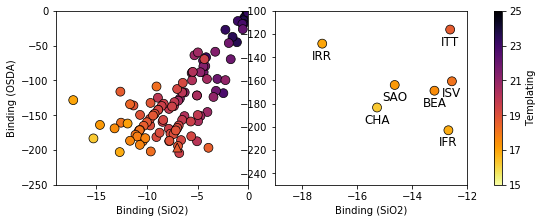

13


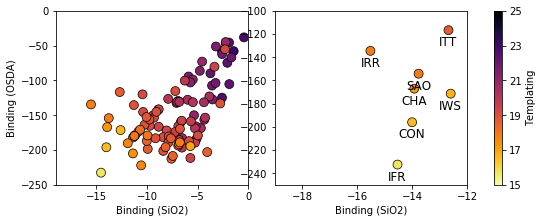

14


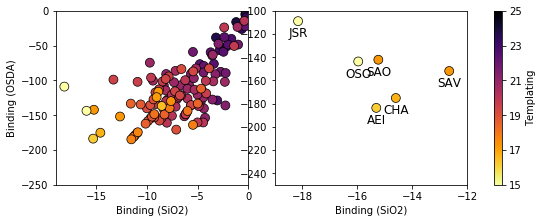

In [5]:
for name, OSDA in osdas.items():
    print(name)
    d = plot_osda(OSDA, name)
    d.to_csv(f'../data/osda_competition/OSDA_{name}.csv')